This script produces plots from the files produced in phenometrics_pixel_out.ipynb.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import importlib.util
import os


In [ ]:
# SELECT PATH TO DATA PRODUCED IN phenometrics_pixel_out.ipynb
input_dir = './2024-06-19_analysis_output_v25'

In [24]:
def load_data(input_dir):
    data = []
    for f in os.listdir(input_dir):
        if f.endswith('.py'):
            module_name = f.split('.')[0]
            file_path = os.path.join(input_dir, f)
            
            spec = importlib.util.spec_from_file_location(module_name, file_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            
            if hasattr(module, 'ndvi_dict'):
                data.append(module.ndvi_dict)
    return data

In [110]:
def plot_ndvi_values(test):    
    plt.figure(figsize=(12, 6))
    plt.plot(test['sos_doys'], test['sos_ndvi_values'], label='SOS NDVI Values')
    plt.plot(test['eos_doys'], test['eos_ndvi_values'], label='EOS NDVI Values')
    try:
        plt.plot(test['fine_doys'], [test['seasonal_amplitude'] for x in range(0,len(test['fine_doys']))], label='Seasonal Amplitude')
    except:
        pass
    try:
        plt.plot(test['fine_doys'], [test['base'] for x in range(0,len(test['fine_doys']))], label='Base')
    except:
        pass
    try:
        plt.plot(test['sos_doys'], [test['sos_threshold'] for x in range(0,len(test['sos_doys']))], label='SoS Threshold')
    except:
        pass
    try:
        plt.plot(test['eos_doys'], [test['eos_threshold'] for x in range(0,len(test['eos_doys']))], label='EoS Threshold')
    except:
        pass
    try:
        plt.plot(test['sos_doys'], [test['sos_median_ndvi'] for x in range(0,len(test['sos_doys']))], label='SoS Median NDVI')
    except:
        pass
    try:  
        plt.plot(test['eos_doys'], [test['eos_median_ndvi'] for x in range(0,len(test['eos_doys']))], label='EoS Median NDVI')
    except:
        pass
    try: 
        plt.plot(test['fine_doys'], [test['overall_relative_amplitude'] for x in range(0,len(test['fine_doys']))], label='Relative Amplitude')
    except:
        pass
    

    plt.scatter(test['org_ndvi_doys'], test['org_ndvi_values'], color='red', label='Original NDVI Values', s=10)
    
    

    # Adding a vertical line at DOY 150
    try:
        plt.axvline(x=test['eos_first_of_slope_doy'], color='black', linestyle='--', label='eos_first_of_slope_doy')
    except:
        pass
    try:    
        plt.axvline(x=test['sos_first_of_slope_doy'], color='black', linestyle='--', label='sos_first_of_slope_doy')
    except:
        pass
    try:    
        plt.axvline(x=test['sos_median_of_slope_doy'], color='purple', linestyle='--', label='sos_median_of_slope_doy')
    except:
        pass
    try:    
        plt.axvline(x=test['eos_median_of_slope_doy'], color='purple', linestyle='--', label='eos_median_of_slope_doy')
    except:
        pass
    try:    
        plt.axvline(x=test['sos_relative_amplitude_doy'], color='blue', linestyle='--', label='sos_relative_amplitude_doy')
    except:
        pass
    try:    
        plt.axvline(x=test['eos_relative_amplitude_doy'], color='blue', linestyle='--', label='eos_relative_amplitude_doy')
    except:
        pass
    try:    
        plt.axvline(x=test['max_ndvi_doy'], color='black', linestyle='-', label='Max NDVI')
    except:
        pass

    plt.scatter(test['max_ndvi_doy'], test['max_ndvi_value'], color='green', label='Max NDVI', s=30)



    plt.annotate(f'Max NDVI: {test['max_ndvi_doy']}', xy=(test['max_ndvi_doy'], 0), xycoords=('data', 'axes fraction'),
             xytext=(-20, -10), textcoords='offset points', ha='center', va='top', fontsize=9, color='black', rotation=45)


    plt.xlabel('DOY')
    plt.ylabel('NDVI Value')
    plt.title(f'NDVI Values Over Time Row {test["row"]}, Column {test["col"]}')
    # Adding the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjusting the layout to make room for the legend
    plt.tight_layout()
    plt.show()

In [ ]:
data_list_o = load_data(input_dir)


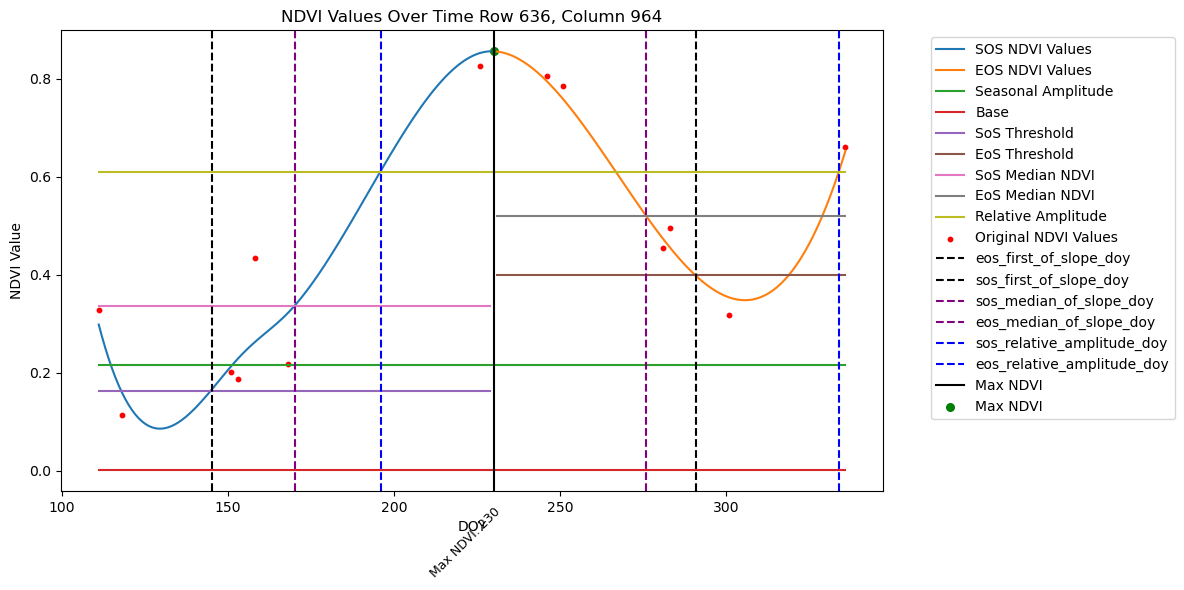

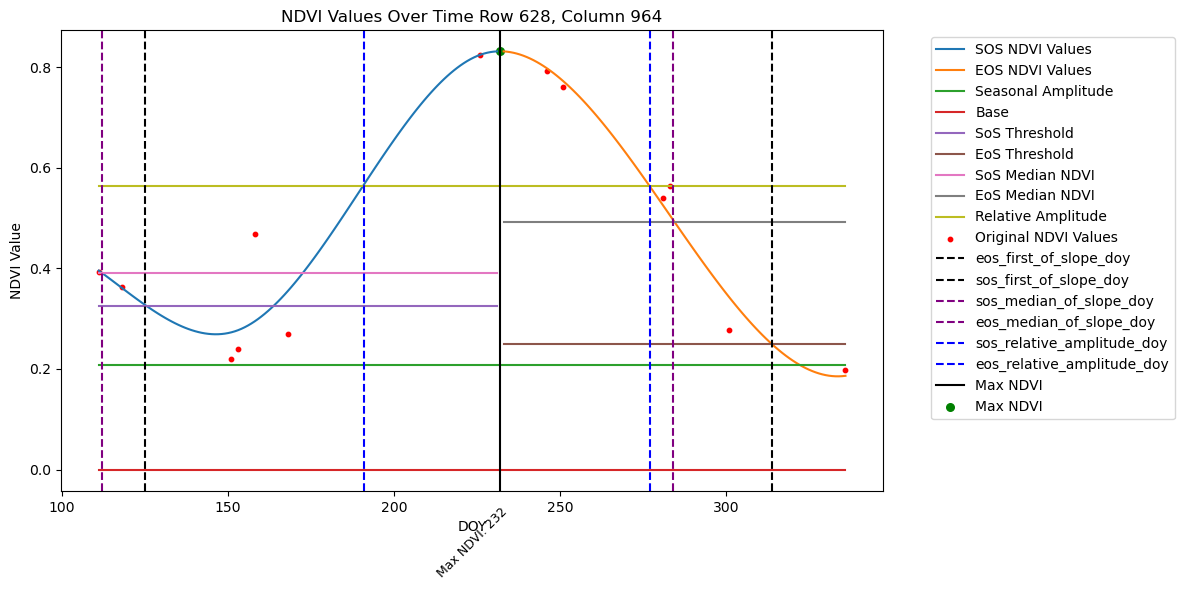

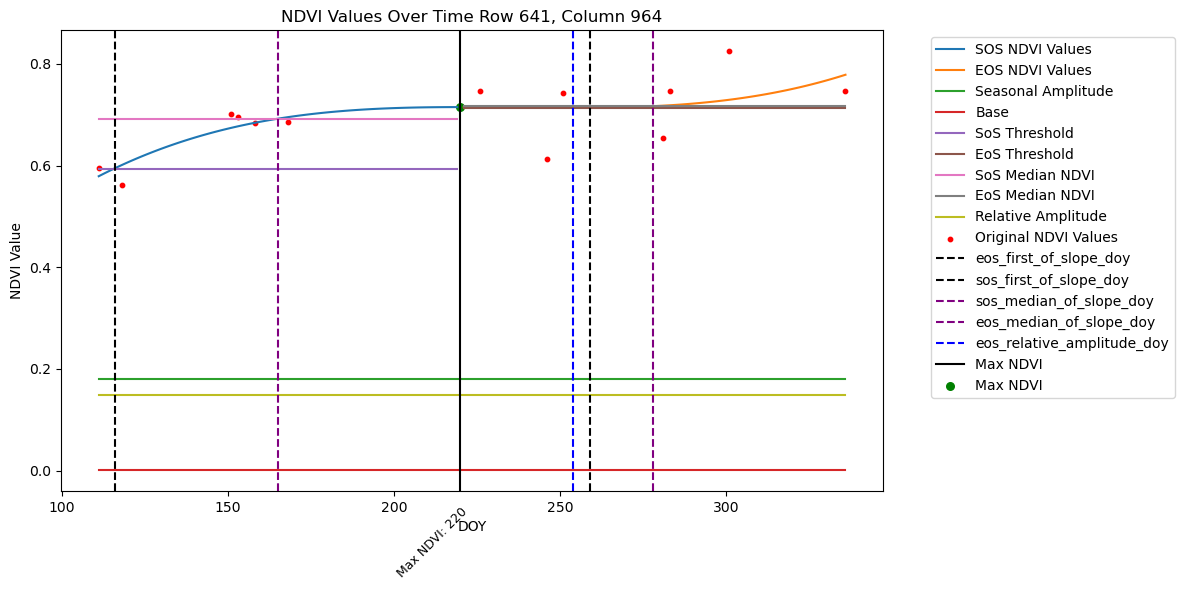

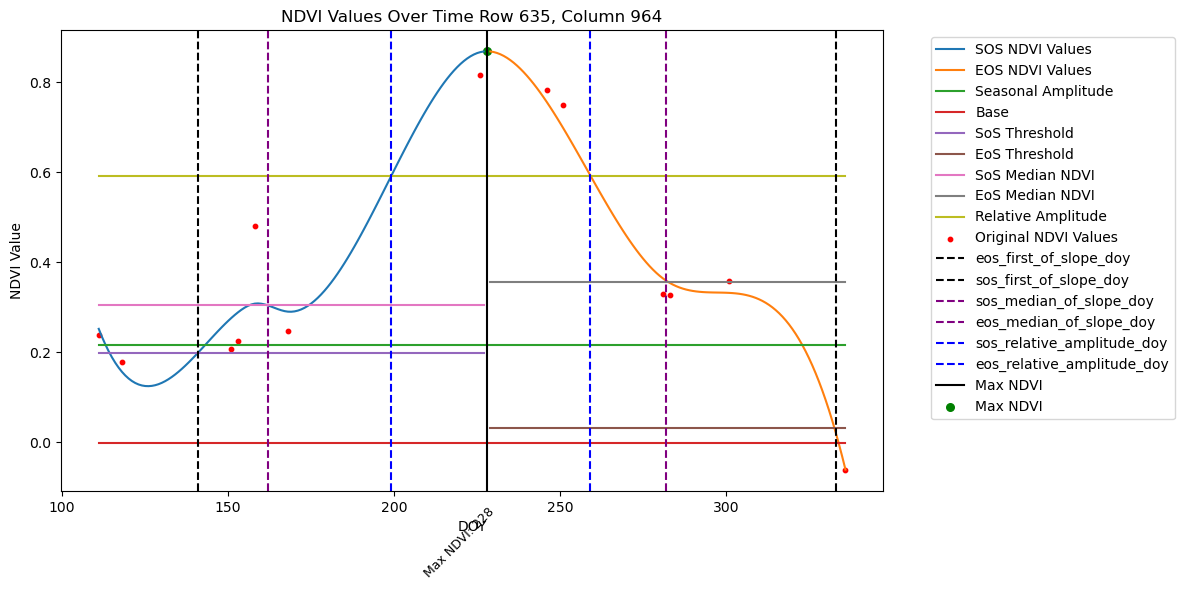

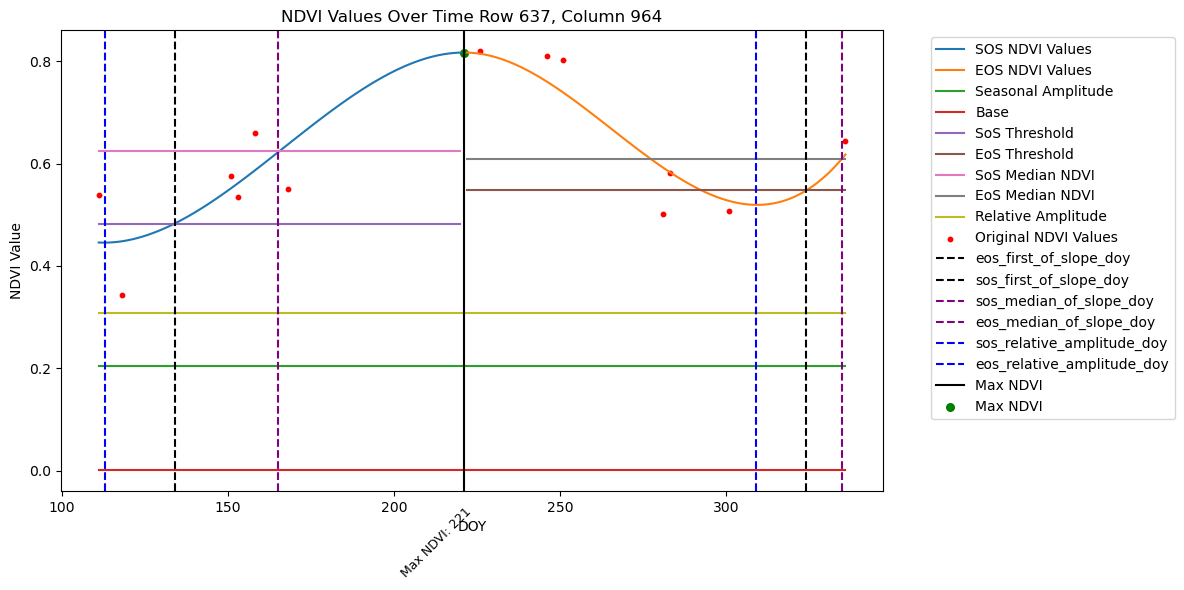

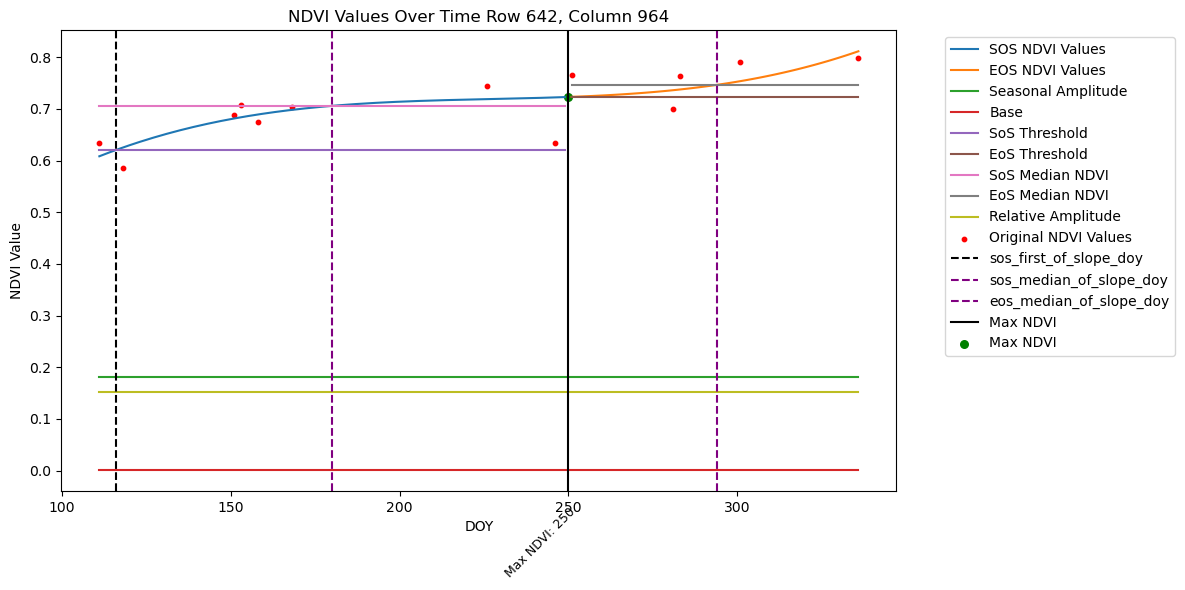

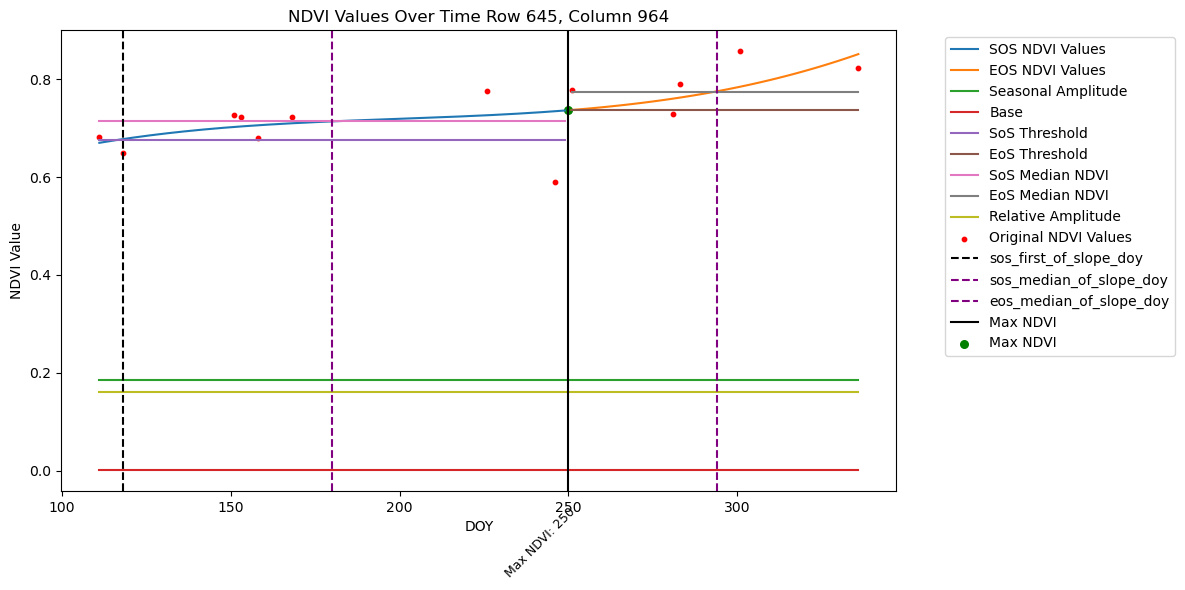

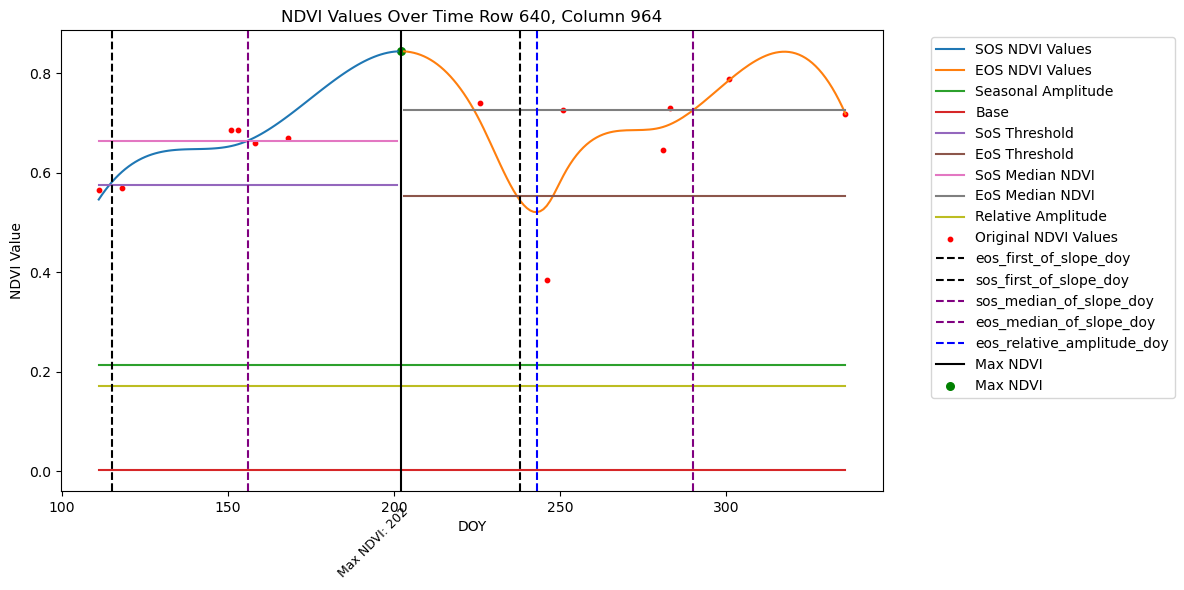

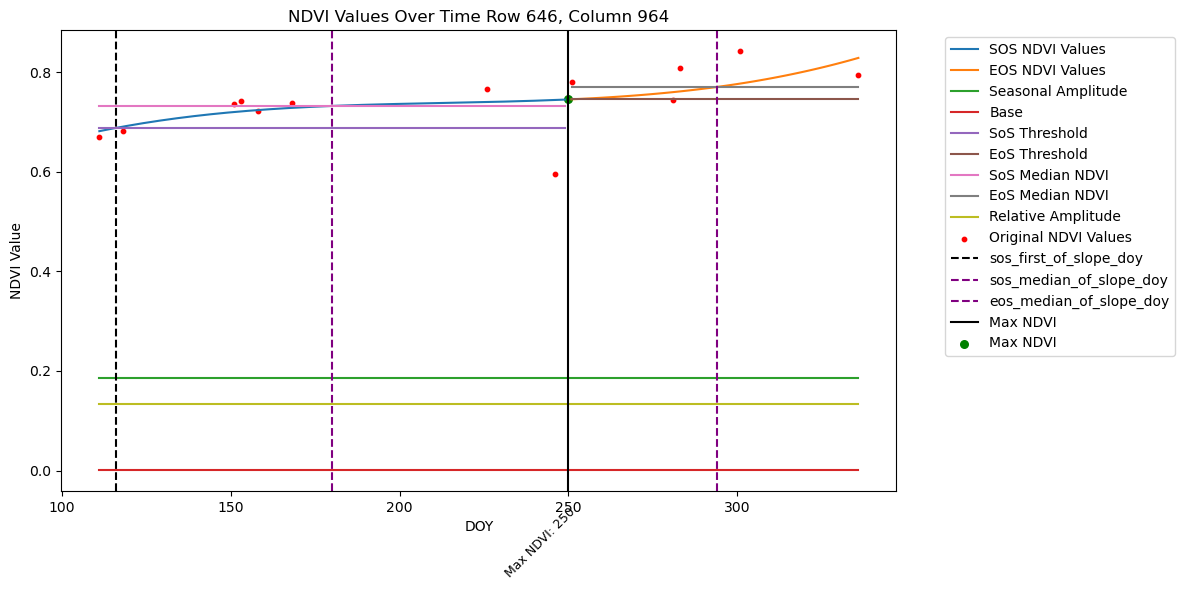

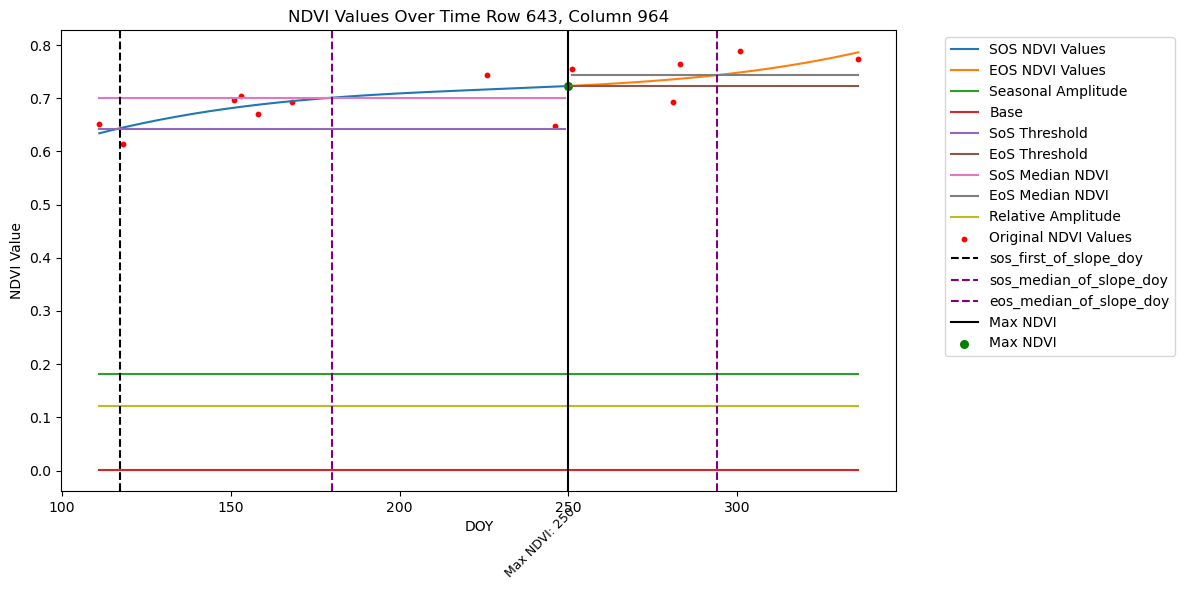

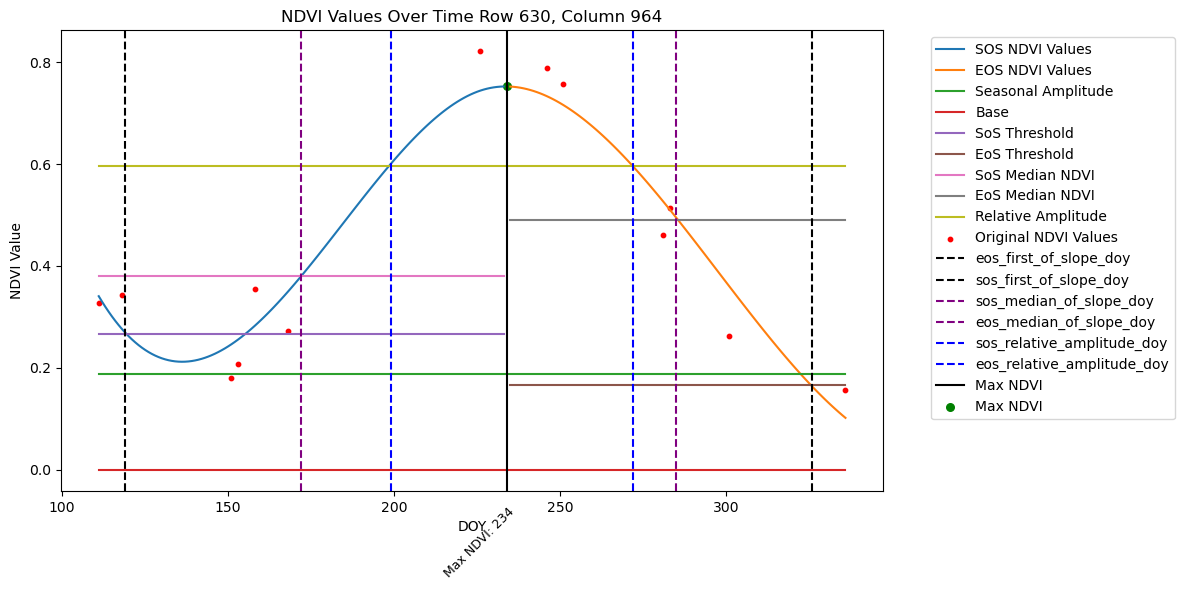

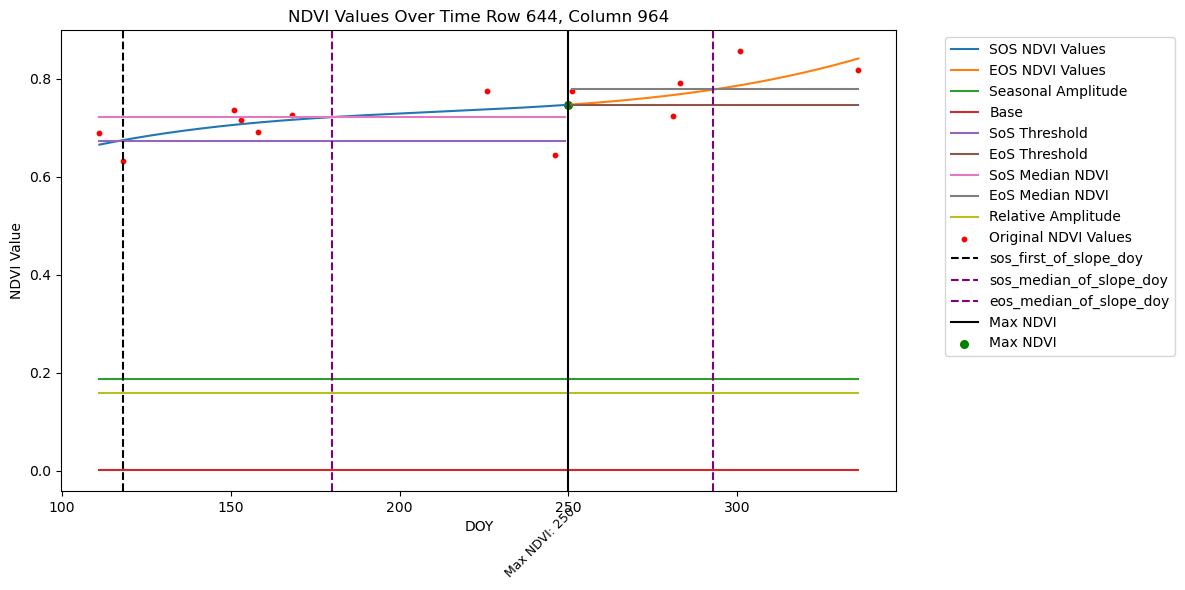

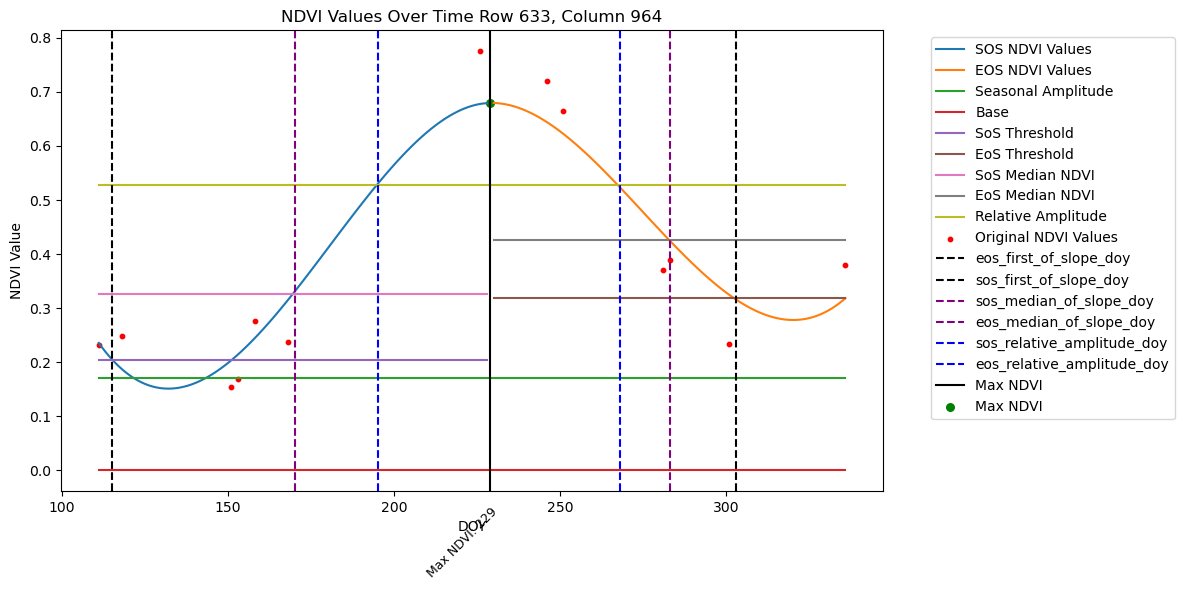

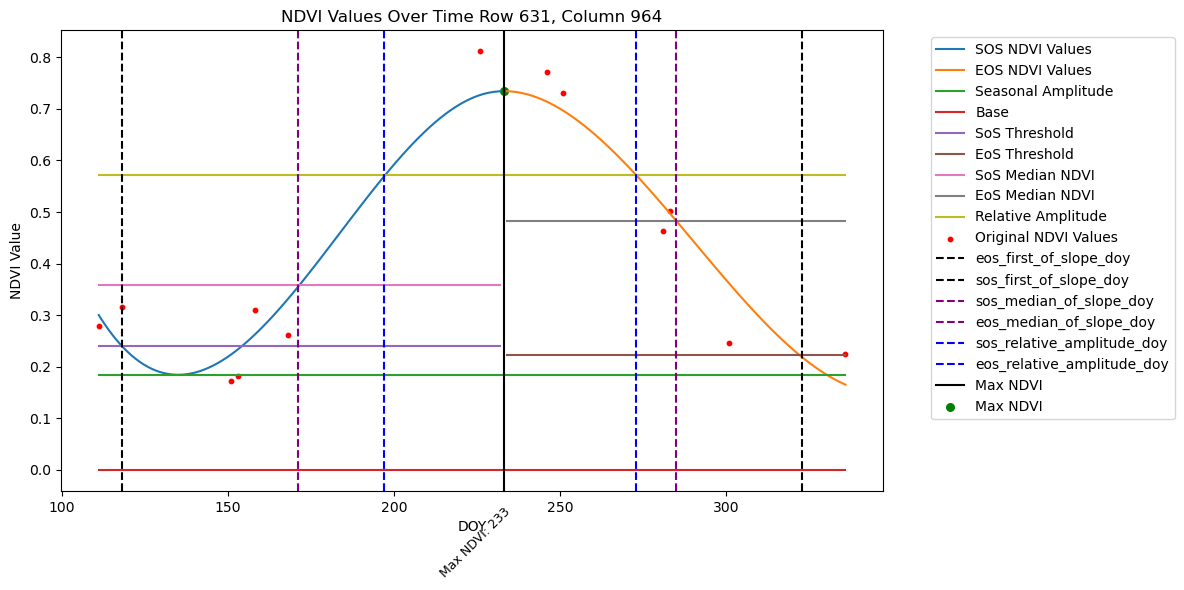

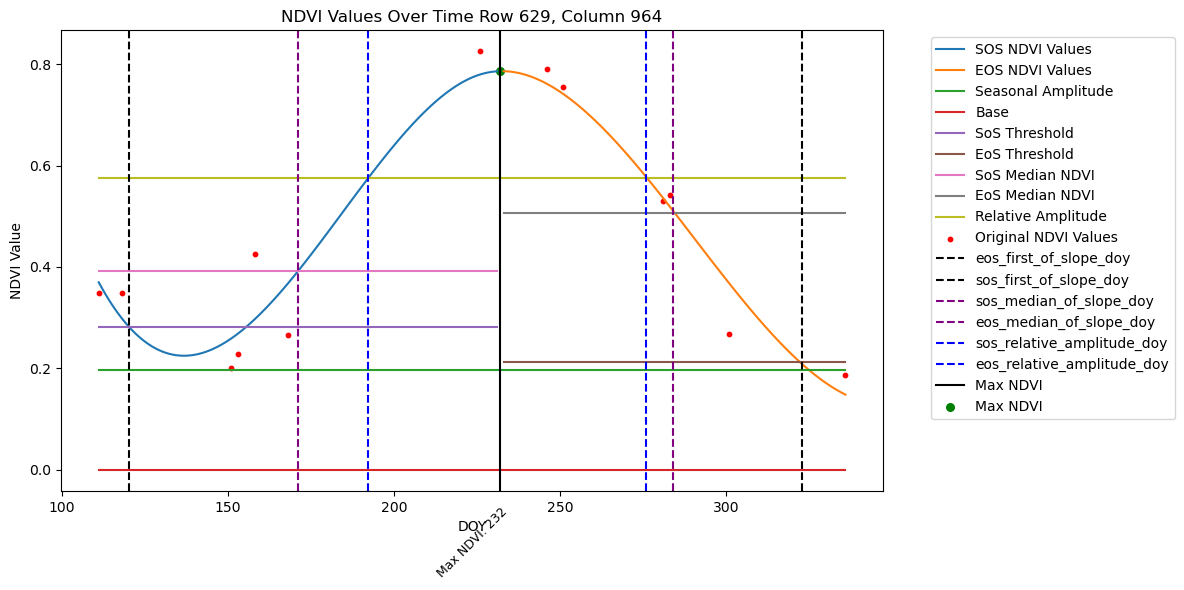

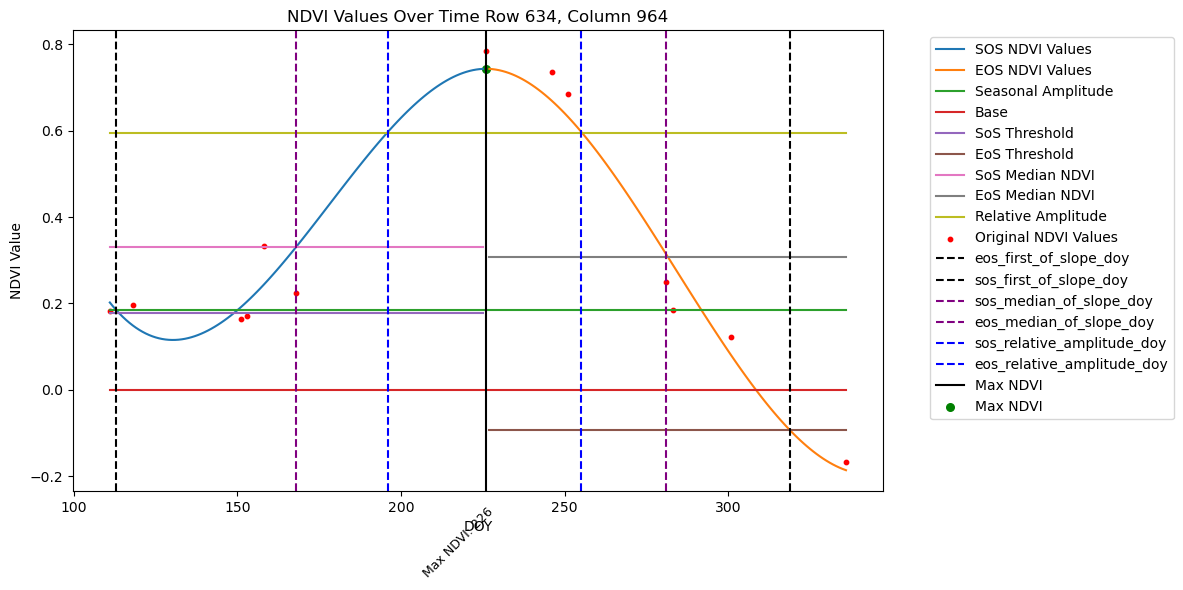

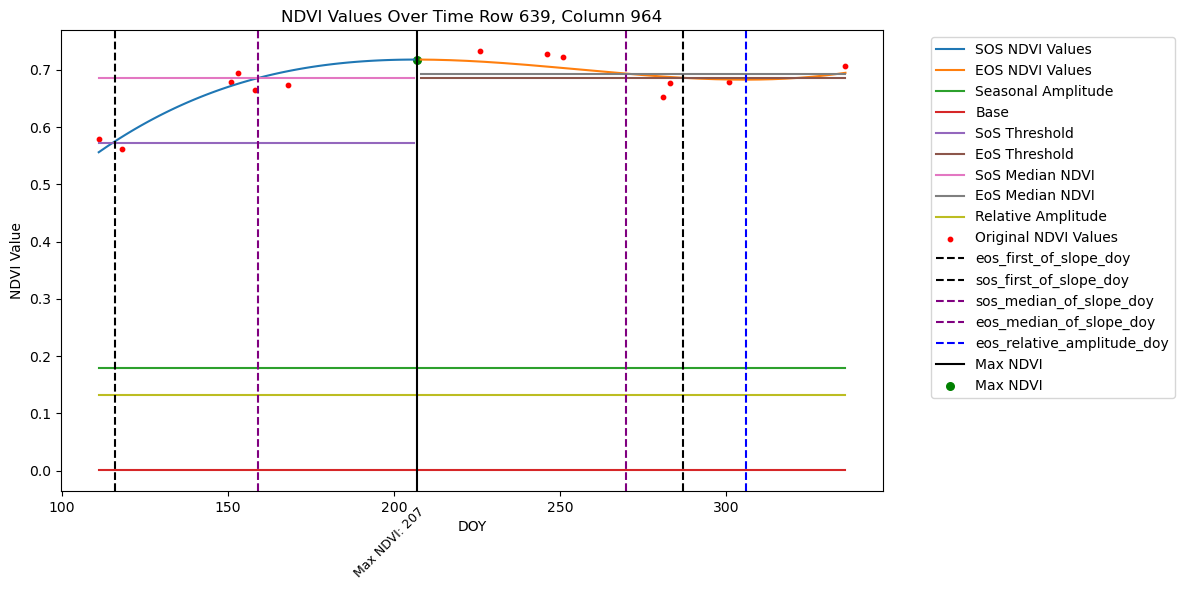

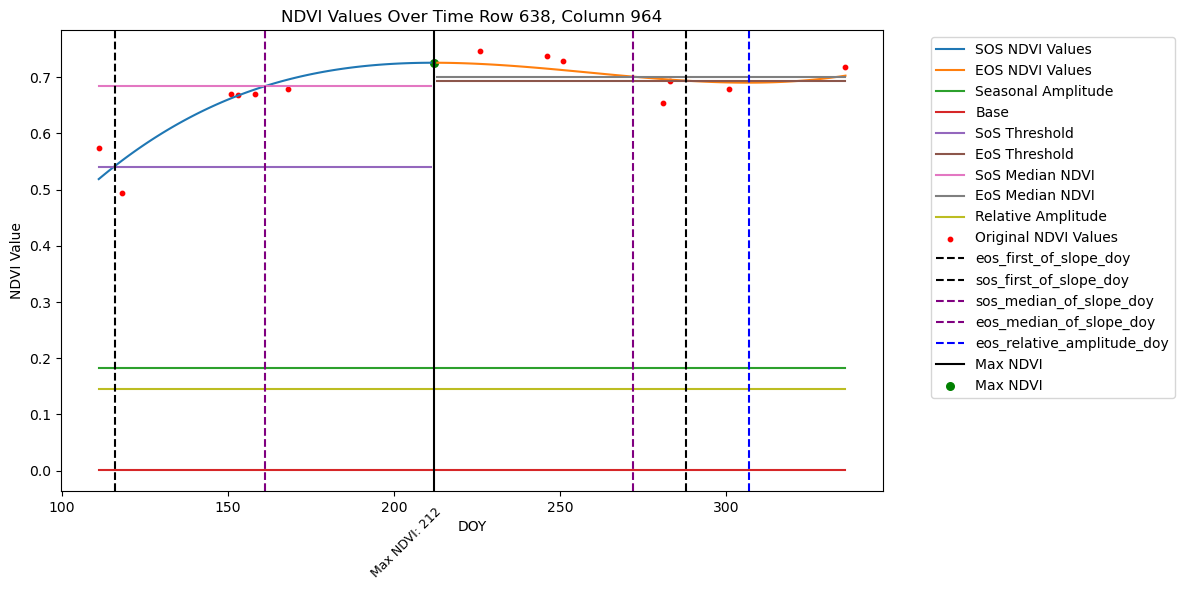

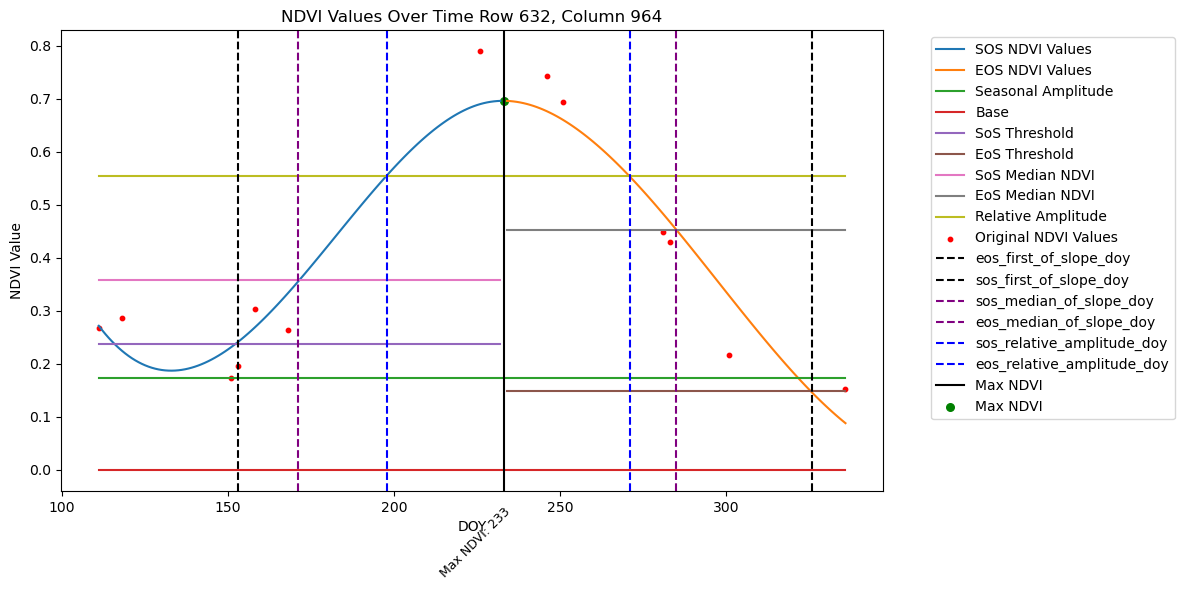

In [111]:
for obj in data_list_o:
    plot_ndvi_values(obj)


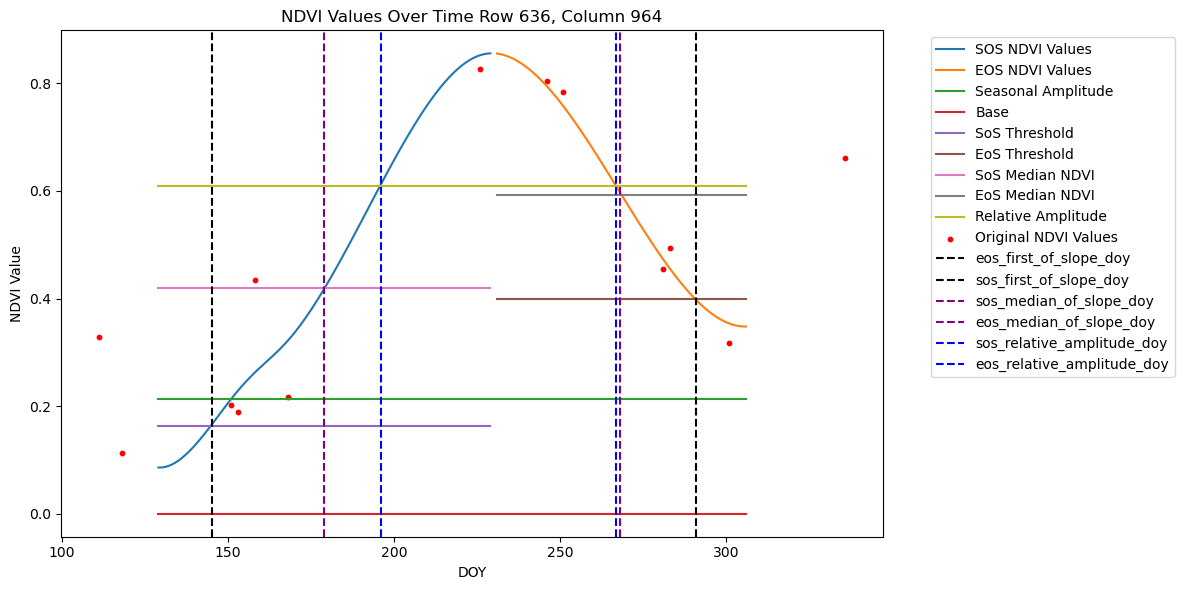

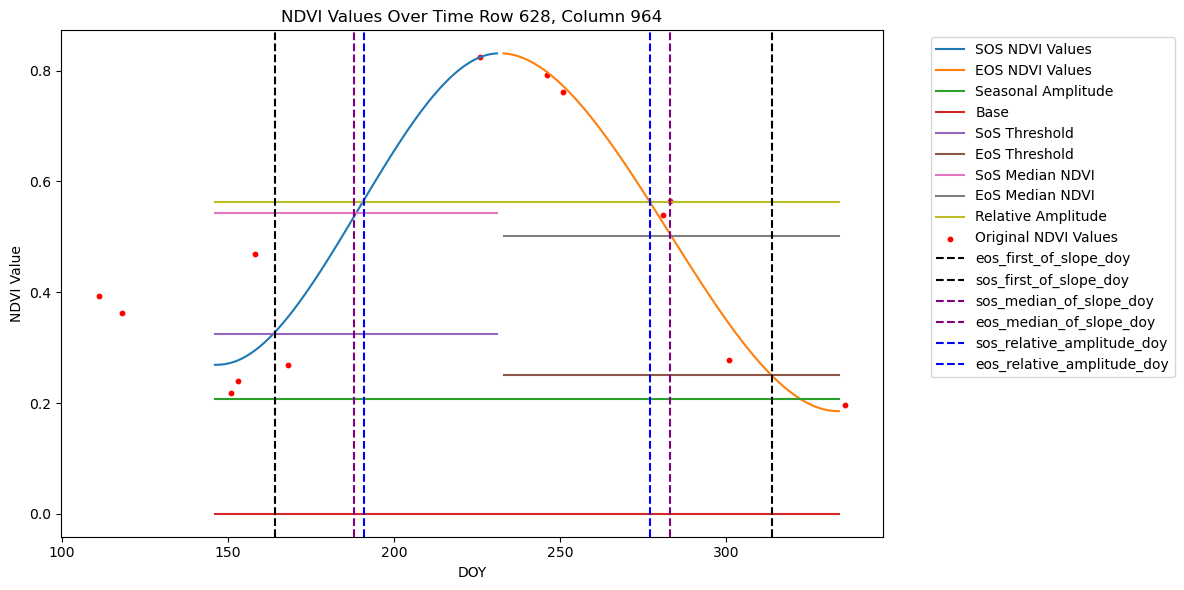

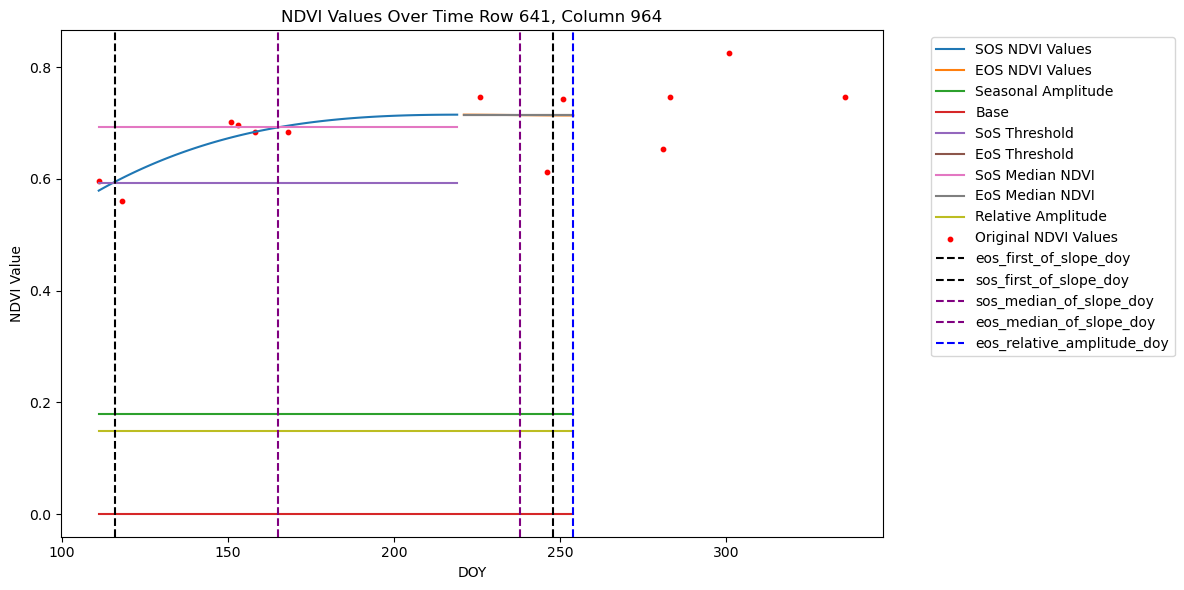

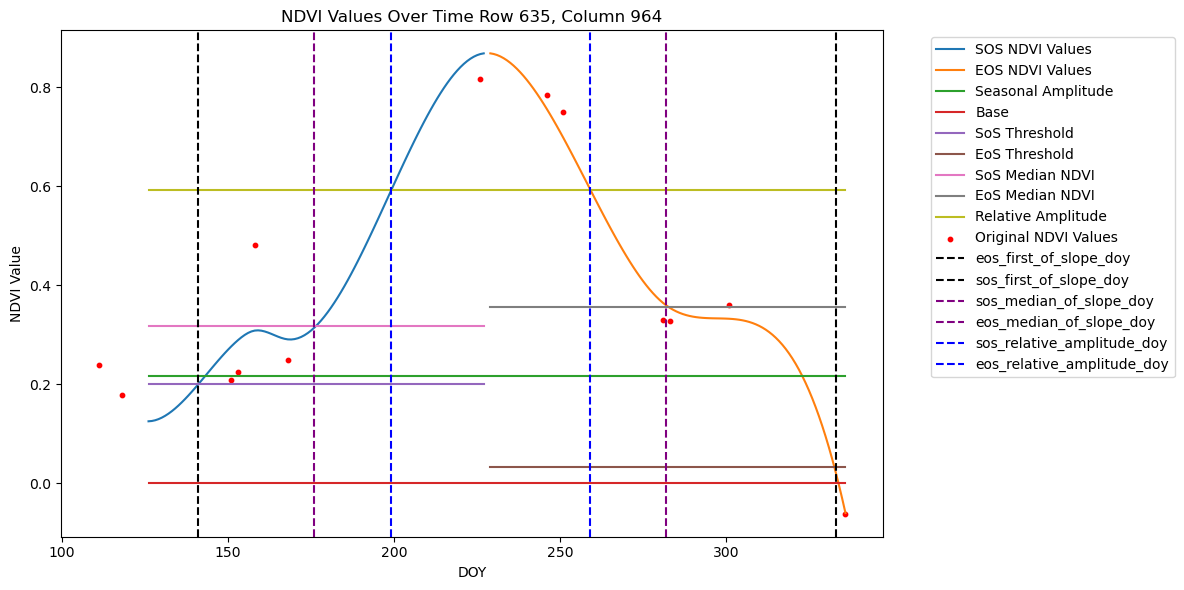

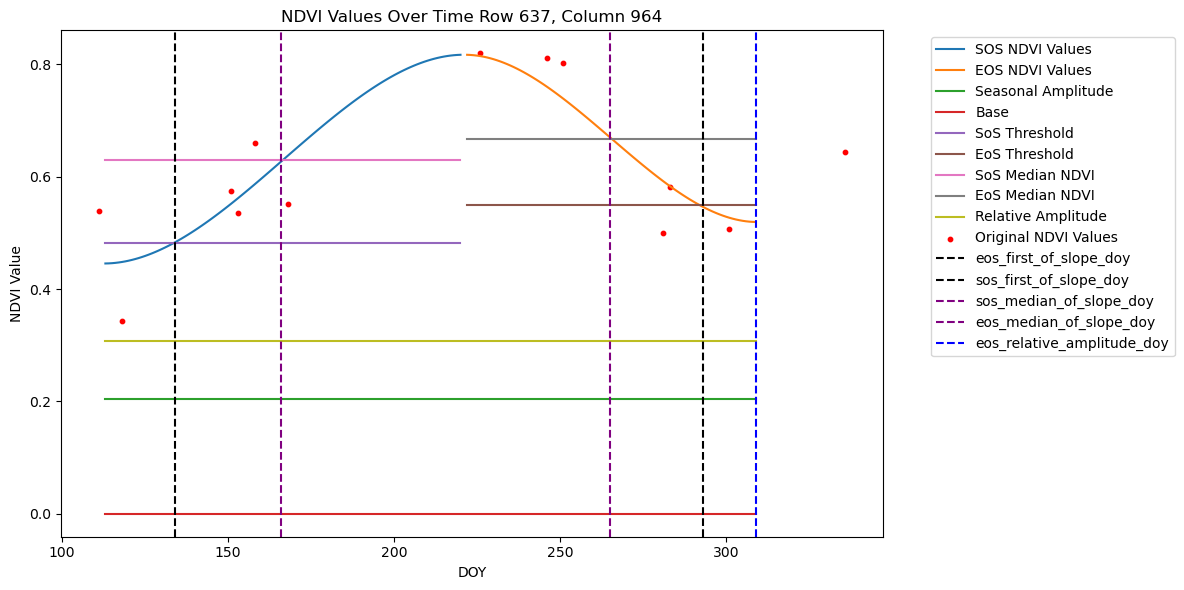

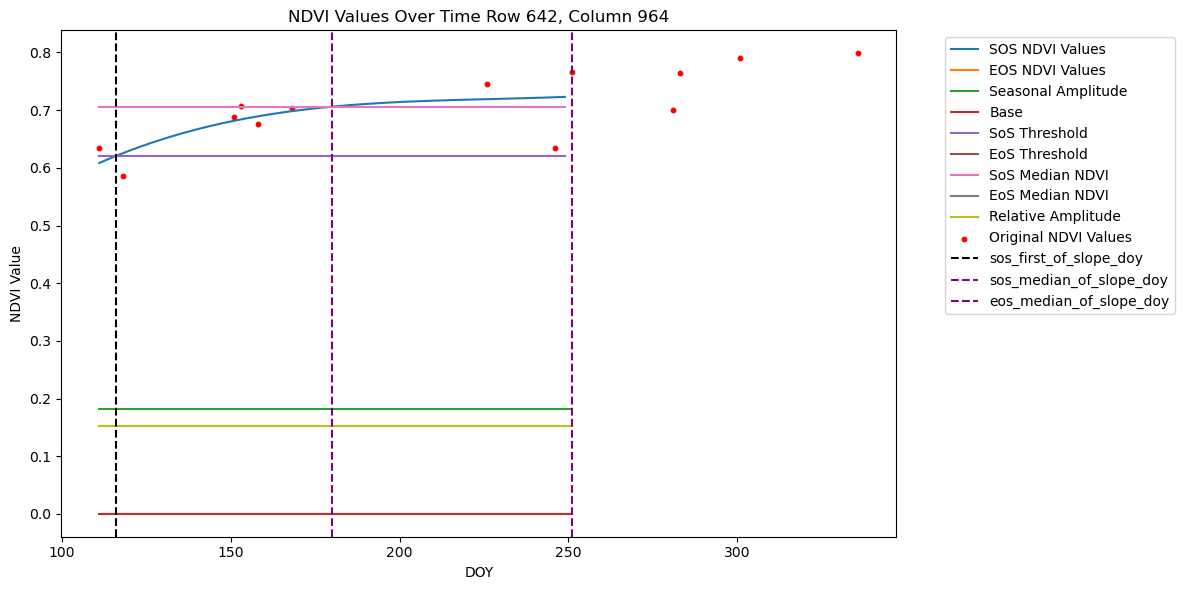

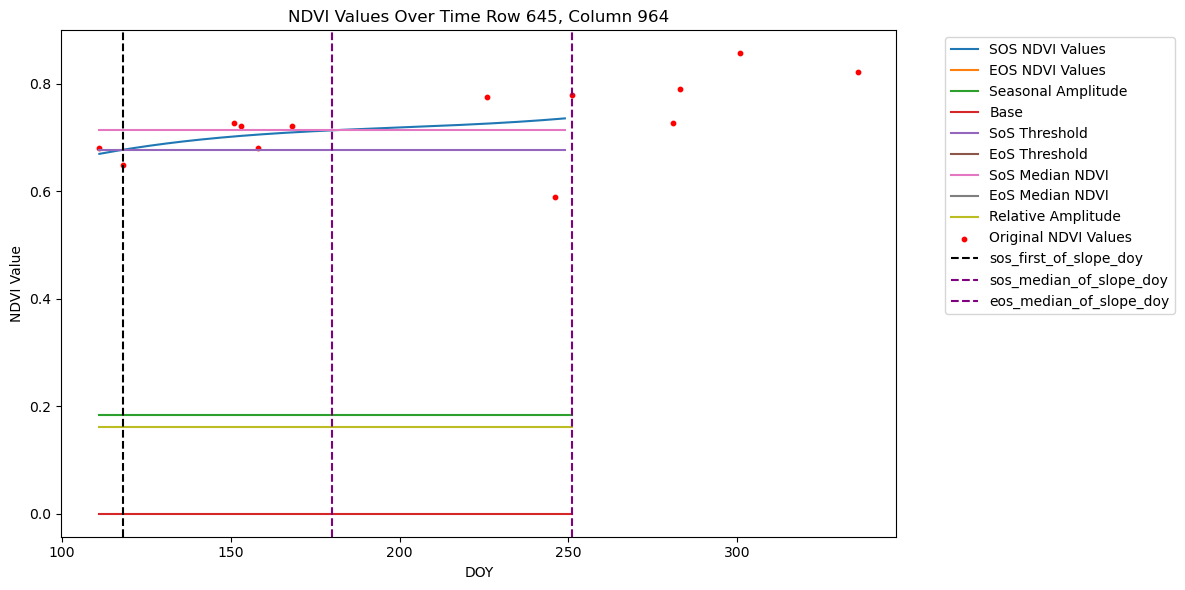

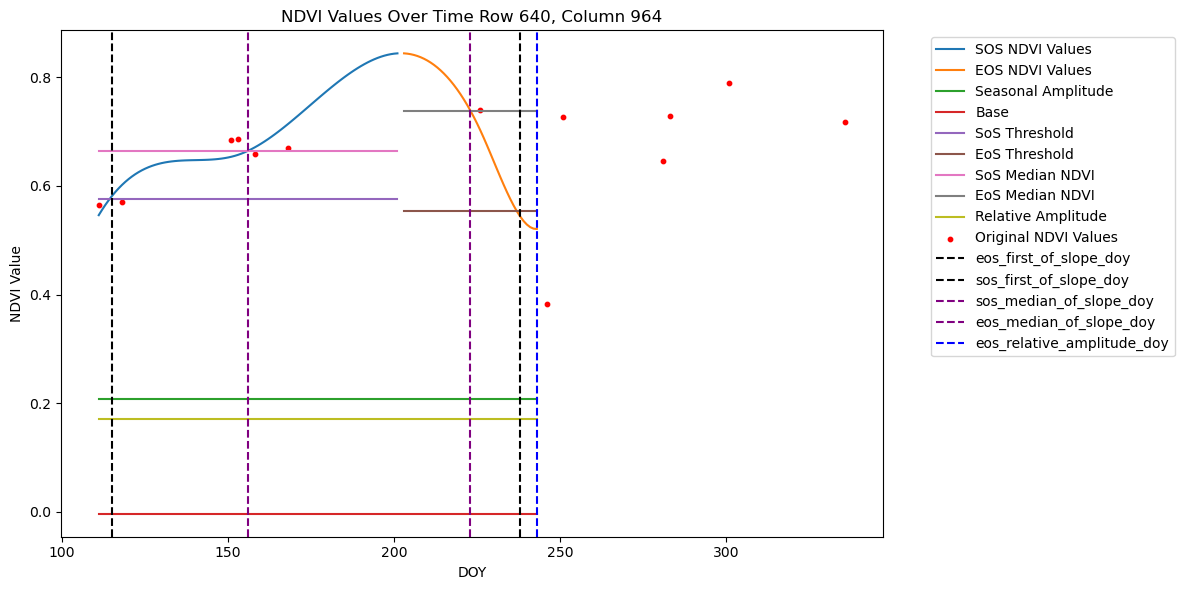

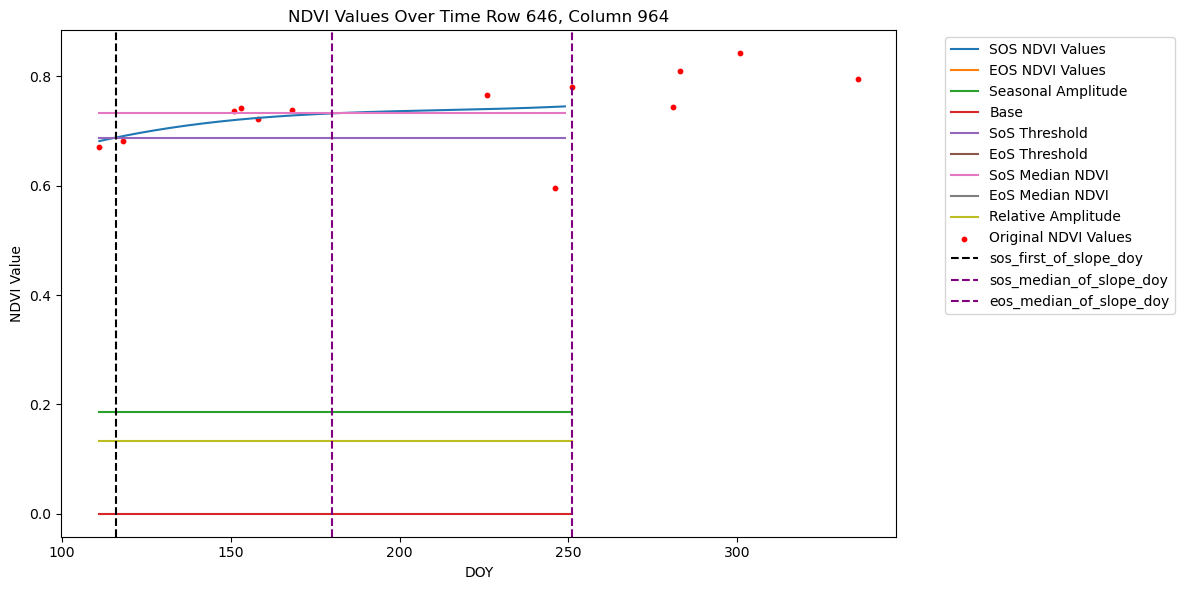

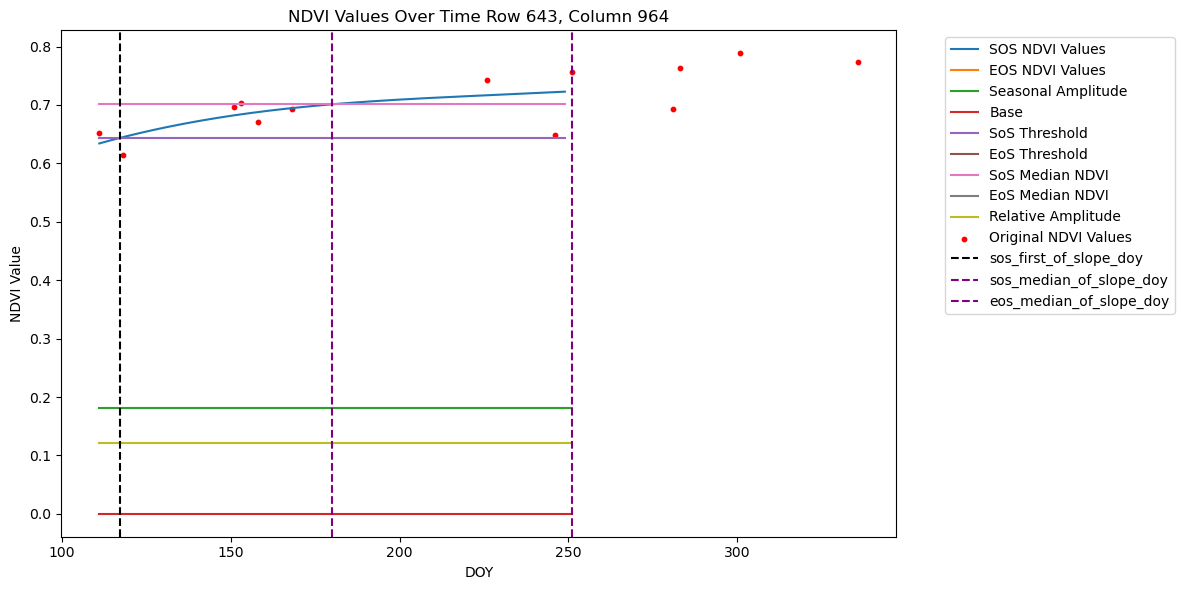

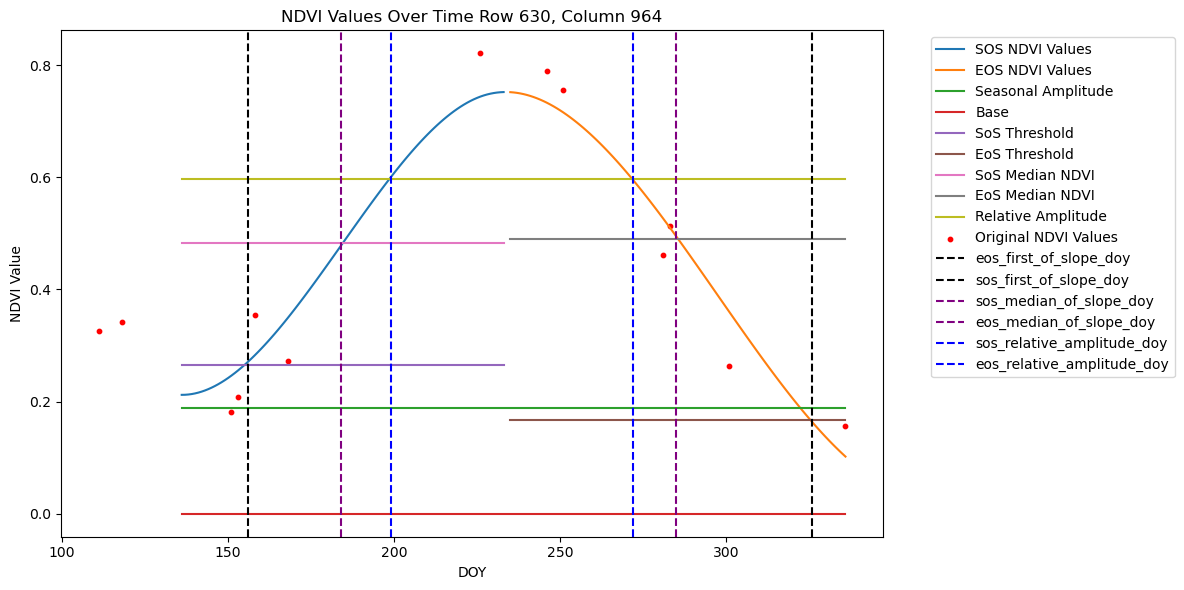

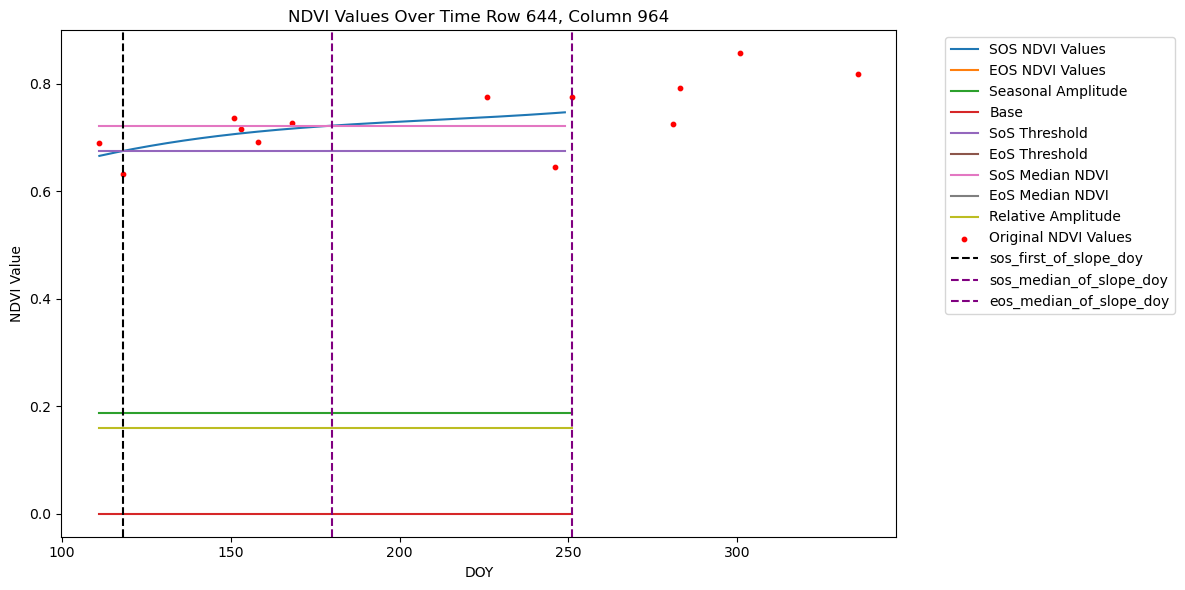

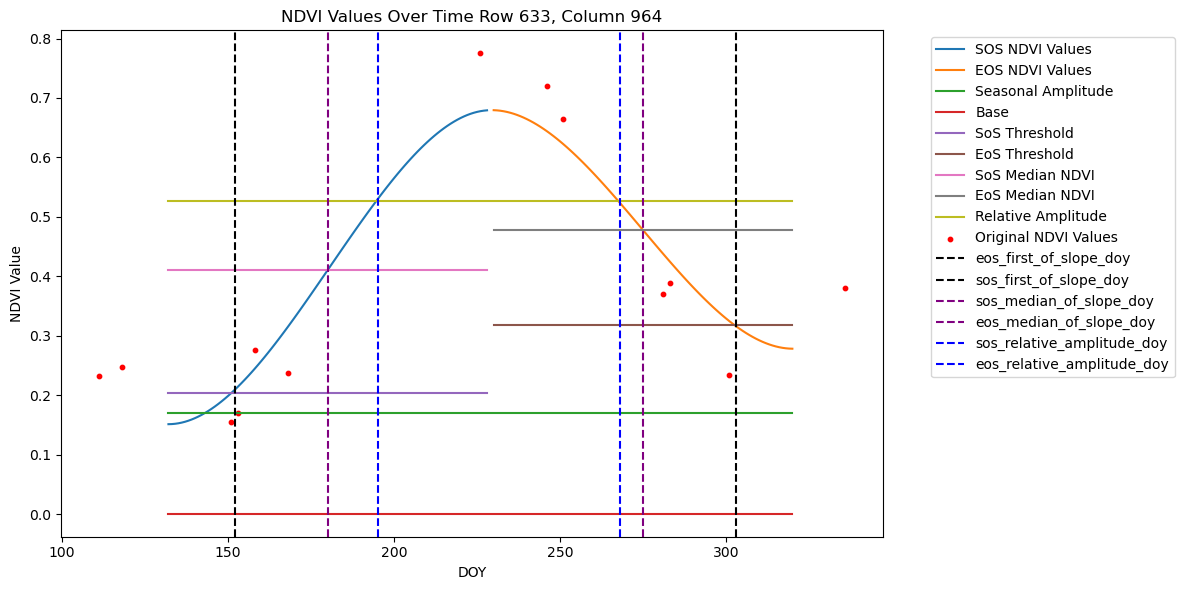

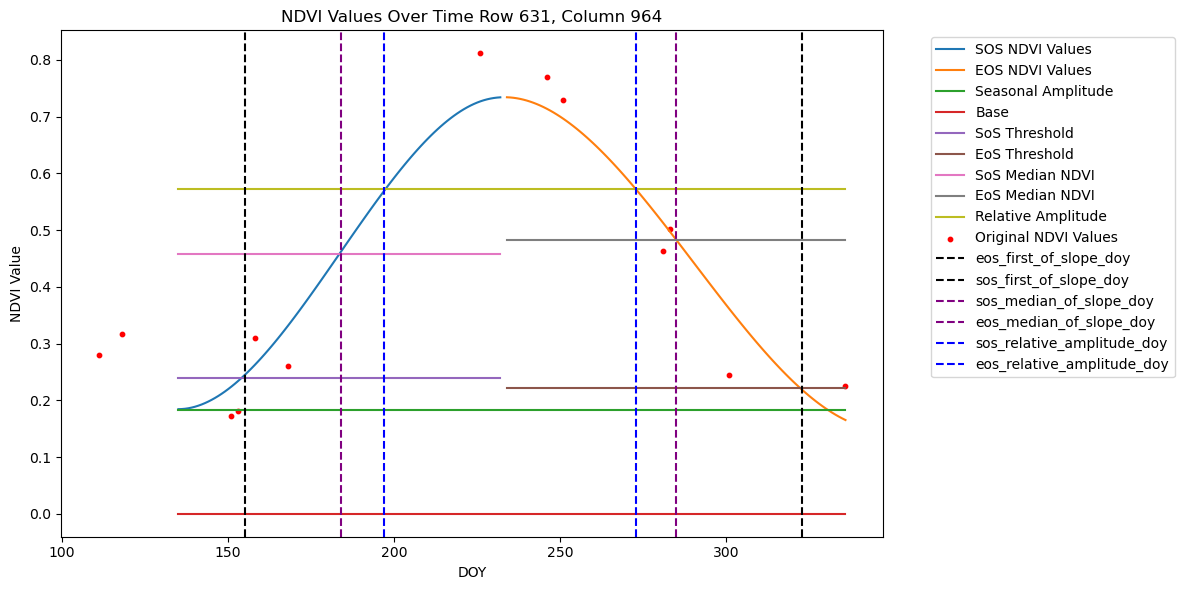

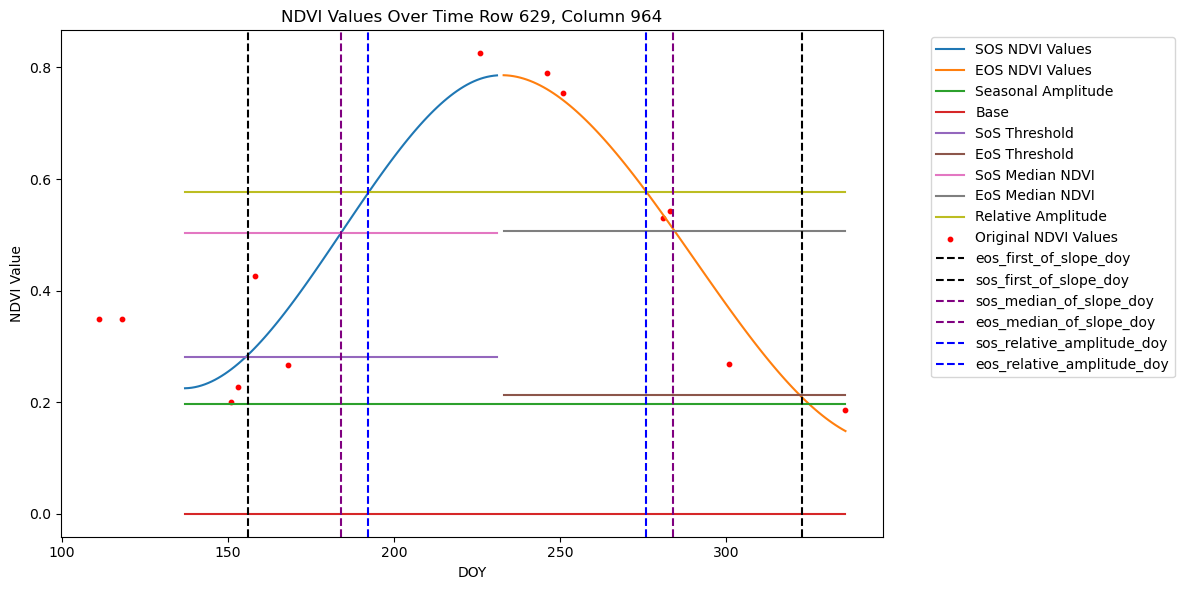

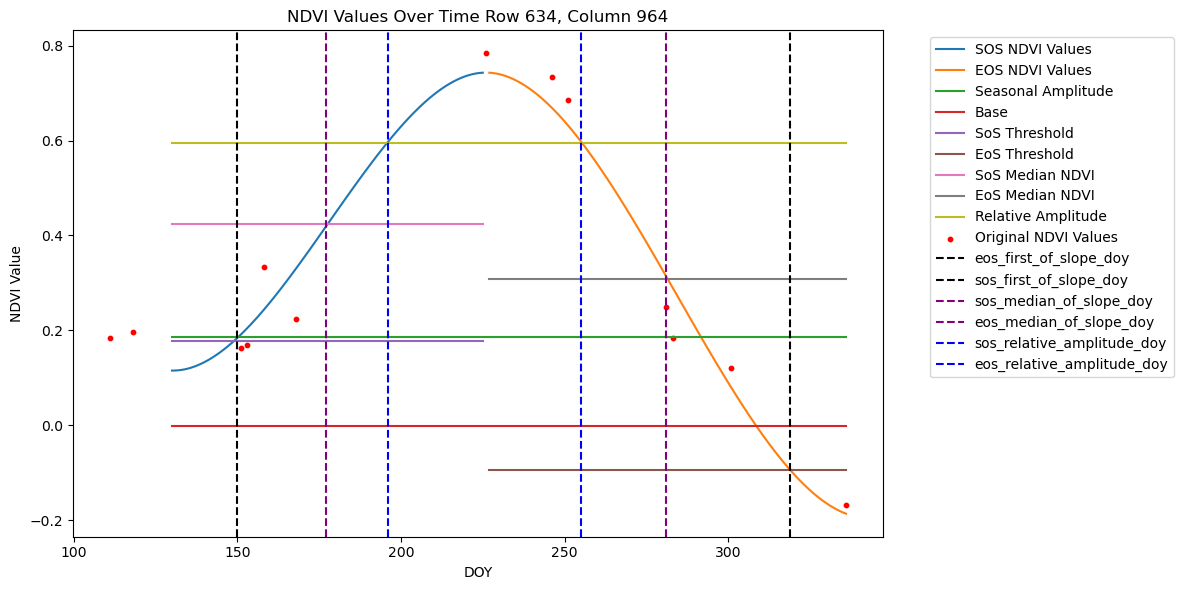

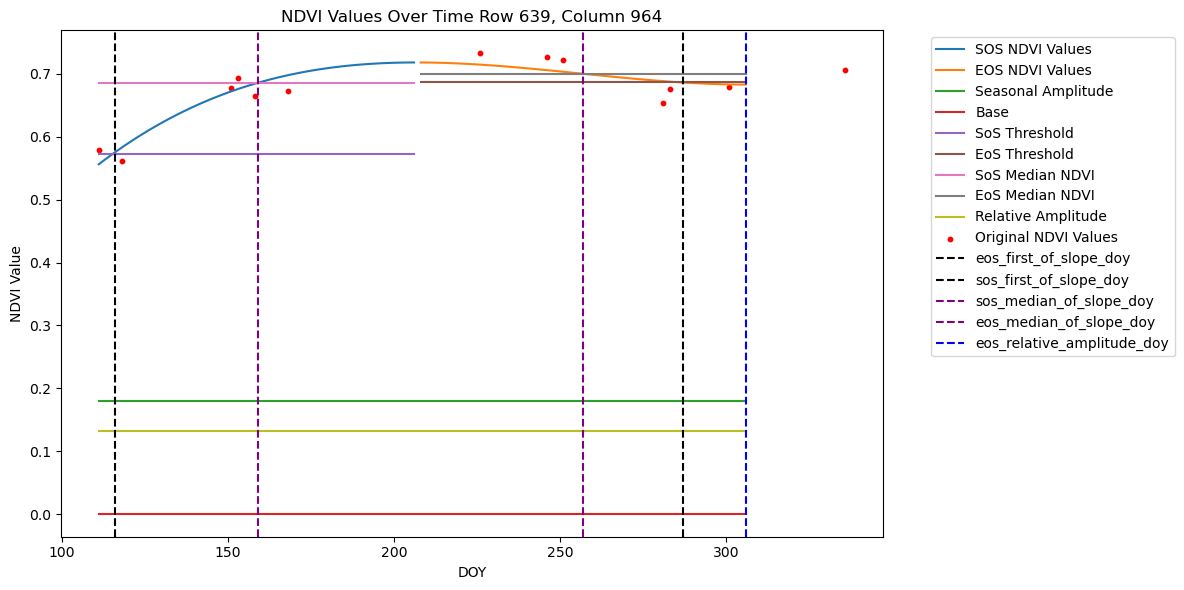

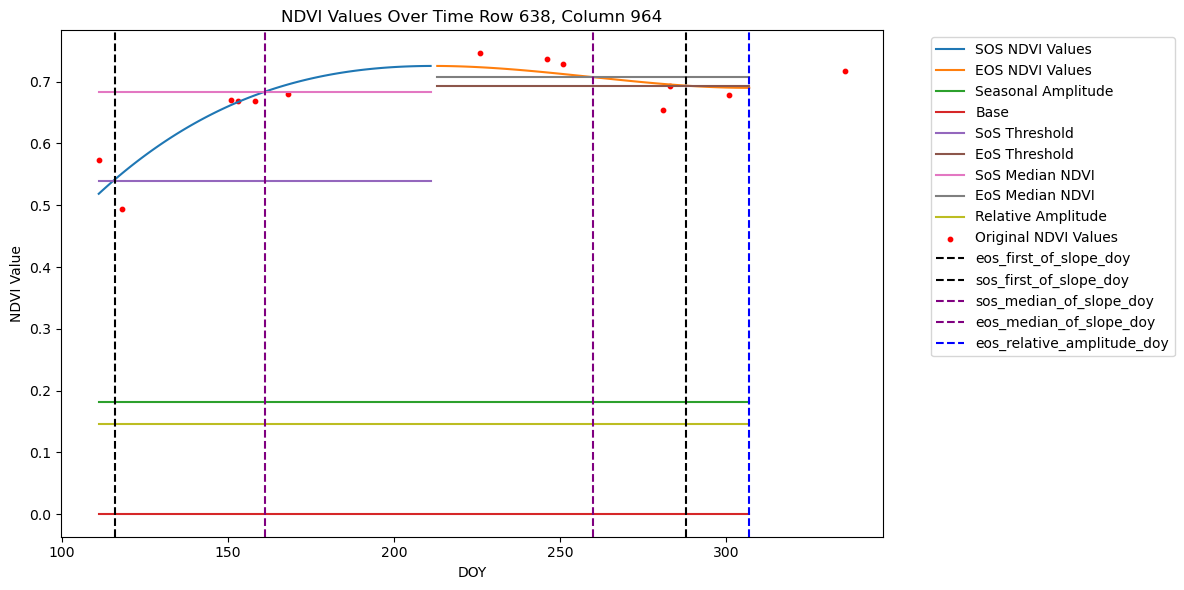

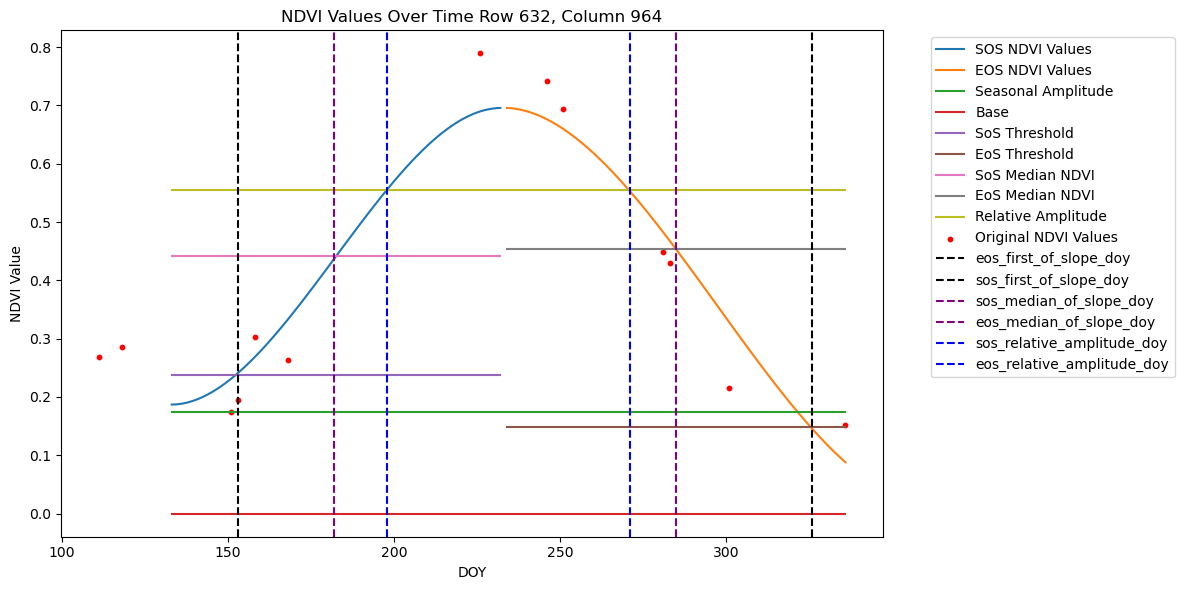

In [90]:
for obj in data_list_n:
    plot_ndvi_values(obj)
